In [1]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import IPython.display as ipd

In [2]:
note_table = pd.read_csv("../Data/Piano/Note_table.tsv", header=0, sep="\t")

## FL

In [3]:
"../Samples/Piano/FL/PN_ab-ba_piano.mp3".split("/")[-1].split(".")[0]

'PN_ab-ba_piano'

In [4]:
def FL_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    y = y[np.argwhere(y >= 0.001)[0][0]:]

    df = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note", "Piano"])
    notes = list(note_table.iloc[37:72]["Note"])

    for i in tqdm(range(0, 16000*35, 16000), total = 35, leave = False):
        df = df.append(pd.DataFrame({**{"x{}".format(j): [y[j+i]] for j in range(16000)}, 
                                    **{"Note": [notes[int(i/16000)]], 
                                       "Piano": [file.split("/")[-1].split(".")[0]]}}))
    df = df.reset_index(drop=True)
    return df

In [5]:
test = FL_file_to_data("../Samples/Piano/FL/PN_ab-ba_piano.mp3", 8000, note_table)

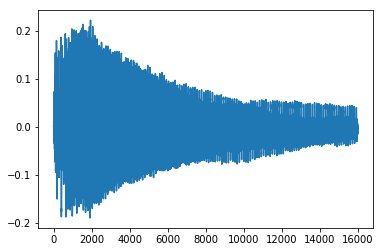

In [6]:
plt.plot(test.drop(["Note", "Piano"], axis=1).iloc[0].values)

In [7]:
ipd.Audio(test.drop(["Note", "Piano"], axis=1).iloc[0].values, rate=8000)

In [8]:
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Note,Piano
0,0.001465,0.001681,0.005331,-0.002838,-0.015286,-0.009736,0.015490,0.010337,0.001405,0.002371,...,0.003488,0.001495,-0.001752,-0.002831,-0.002337,-0.002936,-0.005293,-0.007221,C#3,PN_ab-ba_piano
1,-0.008995,-0.013210,-0.014460,-0.016820,-0.016346,-0.013873,-0.015907,-0.014268,-0.007894,-0.003954,...,-0.021490,-0.023198,-0.019781,-0.015293,-0.012494,-0.012988,-0.014049,-0.012630,D3,PN_ab-ba_piano
2,-0.009459,-0.008396,-0.008832,-0.012935,-0.010718,-0.002320,-0.002686,-0.000303,0.002634,0.000839,...,-0.001041,-0.000368,0.002192,0.005376,0.007840,0.006027,0.003115,0.003368,D#3,PN_ab-ba_piano
3,0.009730,0.016409,0.019472,0.015838,0.014779,0.016792,0.015904,0.019331,0.021950,0.020994,...,-0.009846,-0.014612,-0.016278,-0.014461,-0.012089,-0.009292,-0.008961,-0.012282,E3,PN_ab-ba_piano
4,-0.016608,-0.018866,-0.018244,-0.014823,-0.010421,-0.010667,-0.005970,-0.000487,-0.005703,-0.009161,...,-0.017786,-0.018655,-0.018373,-0.018204,-0.018803,-0.017219,-0.015150,-0.011934,F3,PN_ab-ba_piano


In [9]:
def FL_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note", "Piano"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = FL_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 7 min

In [10]:
data = FL_dir_to_data("../Samples/Piano/FL/", 8000, note_table)

In [11]:
ipd.Audio(data.sample().drop(["Note", "Piano"], axis=1).iloc[0].values, rate=8000)

In [12]:
data["Piano"].unique()

array(['PN_ab-ba_piano', 'PN_arena_ambiance', 'PN_ballad_epiano_1',
       'PN_ballad_epiano_2', 'PN_ballad_epiano_3',
       'PN_ballad_grand_piano', 'PN_delayed_piano', 'PN_digipiano',
       'PN_heaven', 'PN_ibiza', 'PN_nebula', 'PN_nexus_grandpiano',
       'PN_piano_crushed', 'PN_pop_keys', 'PN_powerful_bright',
       'PN_power_grand', 'PN_rocky_piano', 'PN_terminator',
       'PN_trancepiano'], dtype=object)

In [13]:
data.to_csv("../Data/Piano/data_note.tsv", sep="\t", index=0)

In [14]:
data["Freq"] = librosa.note_to_hz(data["Note"])

In [15]:
data["Freq"].unique()

array([138.59131549, 146.83238396, 155.56349186, 164.81377846,
       174.61411572, 184.99721136, 195.99771799, 207.65234879,
       220.        , 233.08188076, 246.94165063, 261.6255653 ,
       277.18263098, 293.66476792, 311.12698372, 329.62755691,
       349.22823143, 369.99442271, 391.99543598, 415.30469758,
       440.        , 466.16376152, 493.88330126, 523.2511306 ,
       554.36526195, 587.32953583, 622.25396744, 659.25511383,
       698.45646287, 739.98884542, 783.99087196, 830.60939516,
       880.        , 932.32752304, 987.76660251])

In [16]:
data.drop("Note", axis=1).to_csv("../Data/Piano/data_freq.tsv", sep="\t", index=0)

In [17]:
data = data.drop("Freq", axis=1)

## Ivy

In [8]:
note_table[note_table["Note"]=="C#3"]

,Note,Freq
37,C#3,138.591315


In [9]:
note_table.iloc[29+8]

Note        C#3
Freq    138.591
Name: 37, dtype: object

In [10]:
"../Samples/Piano/Ivy_audio/29-PedalOffForte1Ambient.mp3".split("/")[-1].split("-")[0]

'29'

In [39]:
def Ivy_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = note_table.iloc[int(file.split("/")[-1].split("-")[0])+8]["Note"]
    df["Note"] = note
    
    return df

In [40]:
test = Ivy_file_to_data("../Samples/Piano/Ivy_audio/29-PedalOffForte1Ambient.mp3", 8000, note_table)

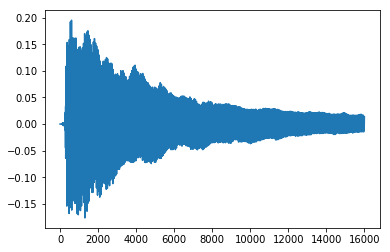

In [41]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [45]:
ipd.Audio(test.drop("Note", axis=1).iloc[0].values, rate=8000)

In [46]:
def Ivy_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = Ivy_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Ivy"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes about 40 min

In [ ]:
data_ivy = Ivy_dir_to_data("../Samples/Piano/Ivy_audio/", 8000, note_table)

In [16]:
data_ivy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Note,Piano
0,0.000010,0.000016,0.000015,0.000041,0.000048,0.000044,0.000048,0.000044,0.000054,0.000078,...,-0.006035,-0.003293,0.001875,0.004712,0.005227,0.008205,0.011982,0.013801,C#3,Ivy
1,-0.000050,-0.000042,0.000023,0.000034,0.000101,0.000057,0.000065,0.000072,0.000073,0.000102,...,0.011403,0.017056,0.017290,0.015712,0.015505,0.011613,0.012289,0.011390,C#3,Ivy
2,0.000018,0.000033,0.000029,0.000032,0.000029,0.000051,0.000072,0.000078,0.000089,0.000100,...,0.009590,0.008375,0.007070,0.003943,0.002195,0.002724,0.000688,-0.003558,C#3,Ivy
3,0.000725,0.002514,0.003072,0.002683,0.001682,0.000231,-0.001103,-0.001602,-0.000866,0.000914,...,0.009279,0.009543,0.008122,0.004733,0.001924,-0.000192,0.003165,0.009916,C#3,Ivy
4,-0.000027,-0.000051,-0.000040,-0.000032,-0.000046,-0.000062,-0.000058,-0.000034,-0.000034,-0.000062,...,-0.001590,-0.001646,-0.001592,-0.001760,-0.001824,-0.001481,-0.001105,-0.000834,C#3,Ivy


In [17]:
data_ivy.shape

(1400, 16002)

In [18]:
data = data.append(data_ivy)

In [19]:
data.shape

(2100, 16002)

In [48]:
data = pd.read_pickle("../Data/Piano/data-FL-Ivy.pkl")

In [51]:
data = data[data["Piano"] != ""].append(data_FL)

In [52]:
data.shape

(2065, 16002)

In [53]:
data.to_pickle("data-FL-Ivy.pkl")

In [54]:
data.to_csv("data-FL-Ivy.tsv", sep="\t", index=False)

##  Estate Grand LE

In [22]:
data = pd.read_pickle("data-FL-Ivy.pkl")

In [23]:
"PDL DWN IN-A#3_0001.mp3".split("-")[1].split("_")[0]

'A#3'

Notes are an octave up here...

In [24]:
def estateLE_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("-")[1].split("_")[0].split(".")[0]
    note = note[:-1] + str(int(note[-1])+1)
    df["Note"] = note
    
    return df

In [25]:
test = estateLE_file_to_data("../Samples/Piano/Estate_Grand_LE/PDL DWN IN-A#2-A#2.mp3", 8000, note_table)

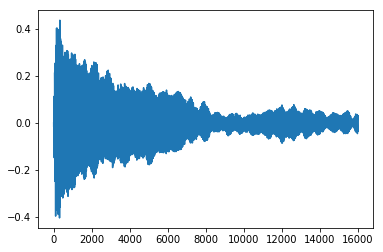

In [26]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [27]:
def estateLE_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = estateLE_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
      
    data["Piano"] = "EstateLE"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 6 min

In [28]:
data_estateLE = estateLE_dir_to_data("../Samples/Piano/Estate_Grand_LE/", 8000, note_table)

In [29]:
data = data.append(data_estateLE)

In [30]:
data["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
       'G5', 'G#5', 'A5', 'A#5', 'B5'], dtype=object)

In [31]:
data.to_pickle("data-piano-large.pkl")

In [32]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## City Piano

In [33]:
data = pd.read_pickle("data-piano-large.pkl")

In [34]:
"../Samples/Piano/City_piano/A#3-1-48.mp3".split("/")[-1].split("-")[0]

'A#3'

In [35]:
def city_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("/")[-1].split("-")[0]
    df["Note"] = note
    
    return df

In [36]:
test = city_file_to_data("../Samples/Piano/City_piano/A#3-1-48.mp3", 8000, note_table)

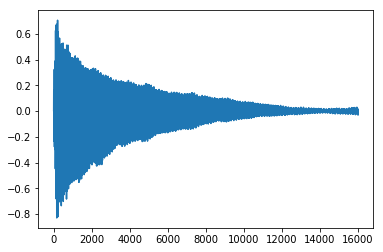

In [37]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [38]:
def city_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = city_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "City"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 3 min

In [39]:
data_city = city_dir_to_data("../Samples/Piano/City_piano/", 8000, note_table)

In [40]:
data = data.append(data_city)

In [41]:
data["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
       'G5', 'G#5', 'A5', 'A#5', 'B5'], dtype=object)

In [42]:
data.shape

(2462, 16002)

In [43]:
data.to_pickle("data-piano-large.pkl")

In [44]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Iowa

In [45]:
data = pd.read_pickle("data-piano-large.pkl")

Here the "b" instead of "#" notation is used

In [46]:
def iowa_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("/")[-1].split("-")[0]
    note = librosa.hz_to_note(librosa.note_to_hz(note))
    df["Note"] = note
    
    return df

In [47]:
test = city_file_to_data("../Samples/Piano/Iowa_piano/A3-1-48.mp3", 8000, note_table)

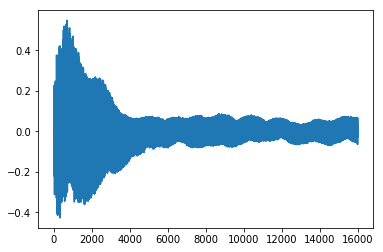

In [48]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [49]:
def iowa_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = iowa_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Iowa"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 2 min

In [50]:
data_iowa = iowa_dir_to_data("../Samples/Piano/Iowa_piano/", 8000, note_table)

In [51]:
data_iowa["Note"].unique()

array(['A3', 'A4', 'A5', 'G#3', 'G#4', 'G#5', 'B3', 'B4', 'B5', 'A#3',
       'A#4', 'A#5', 'C4', 'C5', 'D3', 'D4', 'D5', 'C#3', 'C#4', 'C#5',
       'E3', 'E4', 'E5', 'D#3', 'D#4', 'D#5', 'F3', 'F4', 'F5', 'G3',
       'G4', 'G5', 'F#3', 'F#4', 'F#5'], dtype=object)

In [52]:
data = data.append(data_iowa)

In [53]:
data.shape

(2565, 16002)

In [54]:
data.to_pickle("data-piano-large.pkl")

In [55]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Kawai

In [56]:
data = pd.read_pickle("data-piano-large.pkl")

In [57]:
def kawai_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("/")[-1].split("v")[0]
    df["Note"] = note
    
    return df

In [58]:
test = kawai_file_to_data("../Samples/Piano/Kawai_upright_piano/A3vH.mp3", 8000, note_table)

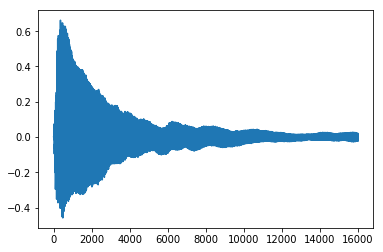

In [59]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [60]:
def kawai_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = kawai_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Kawai"
    data = data.reset_index().drop("index", axis=1)
    return data

In [61]:
data_kawai = kawai_dir_to_data("../Samples/Piano/Kawai_upright_piano/", 8000, note_table)

In [62]:
data_kawai["Note"].unique()

array(['A3', 'A4', 'A5', 'B3', 'B4', 'B5', 'C5', 'D#3', 'D#4', 'D#5',
       'F#3', 'F#4'], dtype=object)

In [63]:
data = data.append(data_kawai)

In [64]:
data.to_pickle("data-piano-large.pkl")

In [65]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Salamander

In [66]:
data = pd.read_pickle("data-piano-large.pkl")

In [67]:
test = kawai_file_to_data("../Samples/Piano/Salamander/A3v1.mp3", 8000, note_table)

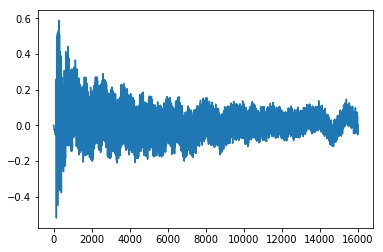

In [68]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

We can use the kawai function

In [69]:
data_salamander = kawai_dir_to_data("../Samples/Piano/Kawai_upright_piano/", 8000, note_table)

In [70]:
data_salamander["Piano"] = "Salamander"

In [71]:
data_salamander["Note"].unique()

array(['A3', 'A4', 'A5', 'B3', 'B4', 'B5', 'C5', 'D#3', 'D#4', 'D#5',
       'F#3', 'F#4'], dtype=object)

In [72]:
data = data.append(data_salamander)

In [73]:
data.shape

(2605, 16002)

In [74]:
data.to_pickle("data-piano-large.pkl")

In [75]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Baldwin

In [76]:
data = pd.read_pickle("data-piano-large.pkl")

Notes are an octave up

In [77]:
note = "../Samples/Piano/Baldwin/Colour_Piano_Down37_a2.mp3".split("/")[-1].split("_")[-1].split(".")[0]
note = note[:-1] + str(int(note[-1])+1)
note.upper()

'A3'

In [78]:
def baldwin_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = file.split("/")[-1].split("_")[-1].split(".")[0]
        note = (note[:-1] + str(int(note[-1])+1)).upper()

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [79]:
test = baldwin_file_to_data("../Samples/Piano/Baldwin/Colour_Piano_Down37_a2.mp3", 8000, note_table)

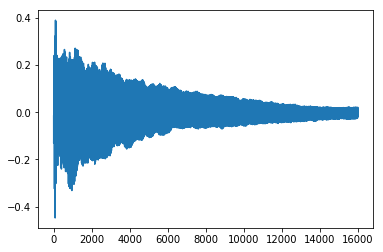

In [80]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [81]:
def baldwin_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = baldwin_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Baldwin"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 7 min

In [82]:
data_baldwin = baldwin_dir_to_data("../Samples/Piano/Baldwin/", 8000, note_table)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [83]:
data_baldwin = data_baldwin.drop(data_baldwin[data_baldwin["Note"].isna()].index)

In [84]:
data_baldwin["Note"].unique()

array(['A3', 'C#3', 'A4', 'C#4', 'F3', 'F4', 'A5', 'C#5', 'F5'],
      dtype=object)

In [85]:
data = data.append(data_baldwin)

In [86]:
data.to_pickle("data-piano-xl.pkl")

In [87]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## A111-A112

In [88]:
"../Samples/Piano/A112-1d-2/0m-042-F#2.mp3".split("/")[-1].split("-")[-1].split(".")[0]

'F#2'

In [89]:
def A112_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = file.split("/")[-1].split("-")[-1].split(".")[0]

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [90]:
test = A112_file_to_data("../Samples/Piano/A112-1d-2/0m-057-A3.mp3", 8000, note_table)

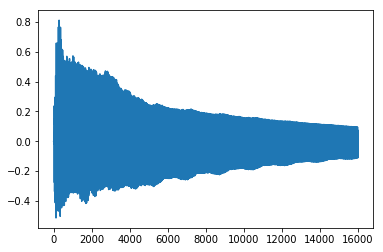

In [91]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [92]:
def A112_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = A112_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "A111-A112"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 4 min

In [93]:
data_A112 = A112_dir_to_data("../Samples/Piano/A112-1d-2/", 8000, note_table)

In [94]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [95]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [96]:
data = data.append(data_A112)

In [97]:
data.to_pickle("data-piano-xl.pkl")

In [98]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 4 min

In [99]:
data_A112 = A112_dir_to_data("../Samples/Piano/A112-1d-1/", 8000, note_table)

In [100]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [101]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [102]:
data = data.append(data_A112)

In [103]:
data.shape

(2927, 16002)

In [104]:
data.to_pickle("data-piano-xl.pkl")

In [105]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 5 min

In [106]:
data_A112 = A112_dir_to_data("../Samples/Piano/A111-1w-1/", 8000, note_table)

In [107]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [108]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [109]:
data = data.append(data_A112)

In [110]:
data.shape

(3004, 16002)

In [111]:
data.to_pickle("data-piano-xl.pkl")

In [112]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 4 min

In [113]:
data_A112 = A112_dir_to_data("../Samples/Piano/A111-1w-2/", 8000, note_table)

In [114]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [115]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [116]:
data = data.append(data_A112)

In [117]:
data.shape

(3081, 16002)

In [118]:
data.to_pickle("data-piano-xl.pkl")

In [119]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Keppy

In [3]:
data = pd.read_pickle("data-piano-xl.pkl")

In [10]:
data = data.drop(data[data["Piano"] == "Keppy"].index, axis=0)

In [4]:
data[data["Piano"] == "Keppy"]

,Note,Piano,x0,x1,x10,x100,x1000,x10000,x10001,x10002,...,x9990,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999


In [12]:
librosa.note_to_midi("A3")

57

In [13]:
int("../KEPSREC057.mp3".split("/")[-1].split(".")[0].replace("KEPSREC",""))

57

In [5]:
def keppy_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = librosa.midi_to_note(int(file.split("/")[-1].split(".")[0].replace("KEPSREC","")))

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [6]:
test = keppy_file_to_data("../Samples/Piano/Keppy/KEPSREC050.mp3", 8000, note_table)

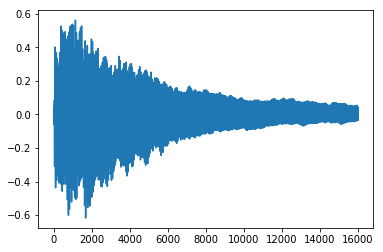

In [7]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [8]:
def keppy_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = keppy_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Keppy"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 3 min

In [9]:
data_keppy = keppy_dir_to_data("../Samples/Piano/Keppy/", 8000, note_table)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
data_keppy = data_keppy.drop(data_keppy[data_keppy["Note"].isna()].index)

In [11]:
data_keppy["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
       'G5', 'G#5', 'A5', 'A#5', 'B5'], dtype=object)

In [13]:
data = data.append(data_keppy)

In [14]:
data.shape

(3313, 16002)

In [15]:
data.to_pickle("data-piano-xl.pkl")

In [16]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Basilica Upright

No sharp notes here

In [3]:
librosa.note_to_midi("A3")

57

In [32]:
"../F_Sustain-22.mp3".split("/")[-1].split("-")[-1].split(".")[0]

'22'

In [52]:
data = pd.read_pickle("data-piano-xl.pkl")

In [57]:
data = data.drop(data[data["Piano"] == "Basilica"].index, axis=0)

In [56]:
data[data["Piano"] == "Basilica"]

,Note,Piano,x0,x1,x10,x100,x1000,x10000,x10001,x10002,...,x9990,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999


In [70]:
def basilica_upright_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    d = {
        "17": "C3", "18": "D3", "19": "E3", "20": "F3", "21": "G3", "22": "A3", "23": "B3",
        "25": "D4", "26": "E4", "27": "F4", "28": "G4", "29": "A4", "30": "B4",
        "31": "C5", "32": "D5", "33": "E5", "34": "F5", "35": "G5", "36": "A5", "37": "B5"
    }
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        
        note = file.split("/")[-1].split("-")[-1].split(".")[0]

        if note in d.keys():
            note = d[note]
        else:
            note = ""

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [71]:
test = basilica_upright_file_to_data("../Samples/Piano/Basilica_Upright/FF-28.mp3", 8000, note_table)

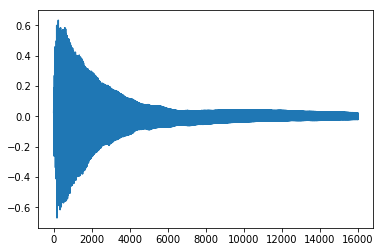

In [72]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [45]:
def basilica_upright_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = basilica_upright_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Basilica Upright"
    data = data.reset_index().drop("index", axis=1)
    data = data.drop(data[data["Note"].isna()].index)
    return data

Takes around 10 min

In [46]:
data_basilica_upright = basilica_upright_dir_to_data("../Samples/Piano/Basilica_Upright/", 8000, note_table)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [59]:
data_basilica_upright["Note"].unique()

array(['D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'D4', 'E4', 'F4', 'G4', 'A4',
       'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5'], dtype=object)

In [69]:
data_basilica_upright[data_basilica_upright["Note"] == "A5"]

,Note,x0,x1,x10,x100,x1000,x10000,x10001,x10002,x10003,...,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999,Piano
126,A5,0.015566,0.011267,-0.101597,0.283912,0.128427,0.014594,0.012203,0.00349,-0.007132,...,0.01502,0.011961,0.002787,-0.007873,-0.014342,-0.013977,-0.00767,0.001647,0.010242,Basilica Upright


In [60]:
data = data.append(data_basilica_upright)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [61]:
data.shape

(3147, 16002)

In [62]:
data.to_pickle("data-piano-xl.pkl")

In [63]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Basilica Grand

Not all notes are present...

In [29]:
data = pd.read_pickle("data-piano-xl.pkl")

In [73]:
data[data["Piano"] == "Basilica"]

,Note,Piano,x0,x1,x10,x100,x1000,x10000,x10001,x10002,...,x9990,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999


In [74]:
data[data["Piano"] == "Basilica Upright"].shape

(222, 16002)

In [75]:
def basilica_grand_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    d = {
        "15": "C3", "16": "D3", "17": "E3", "18": "F#3", "19": "G#3", "20": "A#3",
        "21": "C4", "22": "D4", "24": "F#4", "25": "G#4", "26": "A#4",
        "27": "C5", "28": "D5", "29": "E5", "30": "F#5"
    }
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})

        note = file.split("/")[-1].split("-")[-1].split(".")[0]
        if note in d.keys():
            note = d[note]
        else:
            note = ""
        
        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [76]:
test = basilica_grand_file_to_data("../Samples/Piano/Basilica_Grand/FF-19.mp3", 8000, note_table)

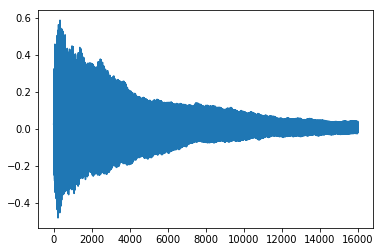

In [77]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [78]:
def basilica_grand_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = basilica_grand_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Basilica Grand"
    data = data.reset_index().drop("index", axis=1)
    data = data.drop(data[data["Note"].isna()].index)
    return data

Takes around 10 min

In [79]:
data_basilica_grand = basilica_grand_dir_to_data("../Samples/Piano/Basilica_Grand/", 8000, note_table)

In [80]:
data_basilica_grand["Note"].unique()

array(['D3', 'E3', 'F#3', 'G#3', 'A#3', 'C4', 'D4', 'F#4', 'G#4', 'A#4',
       'C5', 'D5', 'E5', 'F#5'], dtype=object)

In [81]:
data = data.append(data_basilica_grand)

In [82]:
data.shape

(3329, 16002)

In [83]:
data.to_pickle("data-piano-xl.pkl")

In [84]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Binaural

Not all notes are present...

In [91]:
data = pd.read_pickle("data-piano-xl.pkl")

In [92]:
data = data.drop(data[data["Piano"] == "Binaural"].index, axis=0)

In [93]:
data[data["Piano"] == "Binaural"].shape

(0, 16002)

In [85]:
def binaural_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    d = {
        "12": "C3", "13": "D#3", "14": "F3", "15": "G#3", "16": "A#3",
        "17": "C4", "18": "D#4", "19": "F4", "20": "G#4", "21": "A#4",
        "22": "C5", "23": "D#5", "24": "F5", "25": "G#5", "26": "A#5"
    }
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})

        note = file.split("/")[-1].split("-")[-1].split(".")[0]
        if note in d.keys():
            note = d[note]
        else:
            note = ""
        
        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [86]:
test = binaural_file_to_data("../Samples/Piano/Binaural/AccSus-15.mp3", 8000, note_table)

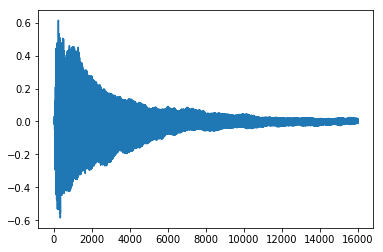

In [87]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [88]:
def binaural_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = binaural_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Binaural"
    data = data.reset_index().drop("index", axis=1)
    data = data.drop(data[data["Note"].isna()].index)
    return data

Takes around 5 min

In [89]:
data_binaural = binaural_dir_to_data("../Samples/Piano/Binaural/", 8000, note_table)

In [94]:
data_binaural["Note"].unique()

array(['D#3', 'F3', 'G#3', 'A#3', 'C4', 'D#4', 'F4', 'G#4', 'A#4', 'C5',
       'D#5', 'F5', 'G#5', 'A#5'], dtype=object)

In [95]:
data = data.append(data_binaural)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [96]:
data.shape

(3278, 16002)

In [101]:
data = data.reset_index(drop=True)

In [102]:
data.to_pickle("data-piano-xl.pkl")

In [103]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)